In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dat = pd.read_csv("data.csv")
#dat.head()
#dat.shape
#dat_dict['Category'].unique().shape[0]

In [68]:
dat[(dat['SubclassName'] == 't-shirts_s_s') & (dat['CountryName'] =='Poland') & (dat['ClassName'] == 't-shirts')].groupby(['BrandName','DepartmentName']).count()

STCL  SubclassName  ClassName  CountryName  Season  \
BrandName DepartmentName                                                       
CROPP     ladies'_CROPP    301           301        301          301     301   
          men's_CROPP      383           383        383          383     383   
HOUSE     ladies'_HOUSE    394           394        394          394     394   
          men's_HOUSE      471           471        471          471     471   
MOHITO    ladies'_MOHITO   514           514        514          514     514   

                          SpeedOfSalesBest3Weeks  SpeedOfSalesFirst3Weeks  \
BrandName DepartmentName                                                    
CROPP     ladies'_CROPP                      301                      301   
          men's_CROPP                        383                      383   
HOUSE     ladies'_HOUSE                      394                      394   
          men's_HOUSE                        471                      471   
MOHITO    ladies'_MOHITO                     514                      514   

                          PriceCategory  Category  
BrandName DepartmentName                           
CROPP     ladies'_CROPP             301       301  
          men's_CROPP               383       383  
HOUSE     ladies'_HOUSE             394       394  
          men's_HOUSE               471       471  
MOHITO    ladies'_MOHITO            514       514

In [4]:
dat_dict = dat
dat_dict[['SubclassName', 'ClassName', 'DepartmentName', 'BrandName', 'CountryName']] = dat[['SubclassName', 'ClassName', 'DepartmentName', 'BrandName', 'CountryName']].applymap(lambda x: x.replace(" ", "_"))
dat_dict['Category'] = dat_dict[['CountryName', 'BrandName', 'DepartmentName', 'ClassName', 'SubclassName']].agg('.'.join, axis=1)\
dat_dict = {cat: pd.DataFrame(d) for cat, d in dat_dict.groupby('Category')}

In [7]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

def scale_cols(data):
    data[["SpeedOfSalesBest3Weeks","SpeedOfSalesFirst3Weeks"]] = pd.DataFrame(
        scale.fit_transform(data[["SpeedOfSalesBest3Weeks","SpeedOfSalesFirst3Weeks"]]),
        columns = ["SpeedOfSalesBest3Weeks","SpeedOfSalesFirst3Weeks"]).values
    return data

for k in list(dat_dict.keys()):
    dat_dict[k] = scale_cols(dat_dict[k])

In [12]:
Poland = dict((k, dat_dict[k]) for k in list(dat_dict.keys()) if k.startswith('Poland'))

In [69]:
# !pip install pyclustering

In [56]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils.metric import type_metric, distance_metric

In [24]:
km=kmedoids(pl5[['SpeedOfSalesFirst3Weeks', 'SpeedOfSalesBest3Weeks']], [1,3])

<AxesSubplot:xlabel='SpeedOfSalesFirst3Weeks', ylabel='SpeedOfSalesBest3Weeks'>

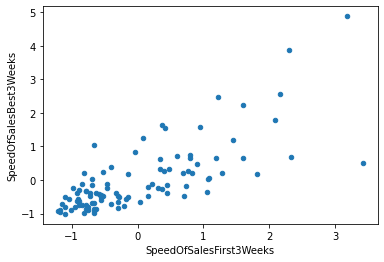

In [19]:
pl5.plot.scatter('SpeedOfSalesFirst3Weeks', 'SpeedOfSalesBest3Weeks')

In [25]:
label = km.predict(pl5[['SpeedOfSalesFirst3Weeks', 'SpeedOfSalesBest3Weeks']])

In [30]:
dir(km)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_kmedoids__calculate_swap_cost',
 '_kmedoids__ccore',
 '_kmedoids__clusters',
 '_kmedoids__create_distance_calculator',
 '_kmedoids__data_type',
 '_kmedoids__distance_calculator',
 '_kmedoids__distance_first_medoid',
 '_kmedoids__distance_second_medoid',
 '_kmedoids__erase_empty_clusters',
 '_kmedoids__itermax',
 '_kmedoids__labels',
 '_kmedoids__medoid_indexes',
 '_kmedoids__metric',
 '_kmedoids__pointer_data',
 '_kmedoids__swap_medoids',
 '_kmedoids__tolerance',
 '_kmedoids__update_clusters',
 '_kmedoids__verify_arguments',
 'get_cluster_encoding',
 'get_clusters',
 'get_medoids',
 'predict',
 'process']

In [34]:
help(kmedoids)

Help on class kmedoids in module pyclustering.cluster.kmedoids:

class kmedoids(builtins.object)
 |  kmedoids(data, initial_index_medoids, tolerance=0.0001, ccore=True, **kwargs)
 |  
 |  !
 |  @brief Class represents clustering algorithm K-Medoids (PAM algorithm).
 |  @details PAM is a partitioning clustering algorithm that uses the medoids instead of centers like in case of K-Means
 |            algorithm. Medoid is an object with the smallest dissimilarity to all others in the cluster. PAM algorithm
ight )$.
 |  
 |  There is an example where PAM algorithm is used to cluster 'TwoDiamonds' data:
 |  @code
 |      from pyclustering.cluster.kmedoids import kmedoids
 |      from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
 |      from pyclustering.cluster import cluster_visualizer
 |      from pyclustering.utils import read_sample
 |      from pyclustering.samples.definitions import FCPS_SAMPLES
 |  
 |      # Load list of points for cluster analysis.
 | 

In [47]:
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
sample = pl5[['SpeedOfSalesFirst3Weeks', 'SpeedOfSalesBest3Weeks']].values.tolist()

In [50]:
initial_medoids = kmeans_plusplus_initializer(sample, 3).initialize(return_index=True)

In [52]:
kmedoids_instance = kmedoids(sample, initial_medoids)

In [59]:
kmedoids_instance.get_clusters()

[[1,
  7,
  12,
  16,
  18,
  20,
  21,
  22,
  23,
  28,
  29,
  33,
  36,
  37,
  45,
  48,
  58,
  60,
  62,
  63,
  75,
  76,
  78,
  79,
  81,
  84,
  86,
  89,
  91,
  95,
  96,
  98],
 [0,
  2,
  3,
  4,
  5,
  6,
  8,
  9,
  10,
  11,
  15,
  17,
  19,
  24,
  25,
  26,
  27,
  30,
  31,
  34,
  35,
  38,
  39,
  40,
  41,
  42,
  44,
  46,
  47,
  49,
  50,
  52,
  53,
  54,
  55,
  56,
  59,
  61,
  64,
  65,
  66,
  67,
  68,
  70,
  71,
  72,
  73,
  74,
  77,
  80,
  82,
  83,
  85,
  87,
  88,
  90,
  92,
  93,
  94,
  97,
  99,
  100],
 [13, 14, 32, 43, 51, 57, 69]]

In [58]:
kmedoids_instance.process()